# A Python Quick Start Tutorial - Part 1
## by Peter Mackenzie-Helnwein
University of Washington, Seattle, WA

pmackenz@uw.edu          
https://www.ce.washington.edu/facultyfinder/peter-mackenzie-helnwein

# Basic Concepts

This notebook is designed as a quick-start guide into python.  This tutorial assumes at least some familiarity with other programming languages such as Java or C/C++.  MATLAB and FORTRAN users are advised to pay special attention to indexing since python uses C-style indexing, i.e., $0 \dots (n-1)$, while MATLAB and FORTRAN use $1 \dots n$. It is by no means a comprehensive guide to python but rather highlights similarities and differences between these languages. 

For a comprehensive introduction to python, I highly recommend reading [The Python Tutorial](https://docs.python.org/3/tutorial/)

## First step: Hello, World!

In [1]:
print("Hello, World!")

Hello, World!


Now that was easy!  What to look out for?  
1. Commands are functions, i.e., argument are given in parenthesis.  No arguments require empty parentheses: print()
2. strings are enclosed in quotes.  Python accepts single and double quotes, so "Hello, World!" and 'Hello, World!' are OK.

In [2]:
print('Hello, World!')

Hello, World!


## Creating Variables - no need for a fancy definition :)

Variable definition happens on the fly.  The type is detected by the value given.

Let's do a simple example computing th ecircumference $cu=2 r \pi$ or a circle:

In [3]:
pi=3.141279
R=10.5

cu = 2*R*pi

To display the result, just ask for the variable (not a good programming style!)

In [4]:
cu

65.966859

The clean version of displaying anything from within a program is the **print** command

In [5]:
print(cu)

65.966859


Some nicer formating using a template string with placeholders {}

In [6]:
print("2*{}*pi = {}".format(R,cu))

2*10.5*pi = 65.966859


**Did you notice: NO SEMICOLON !** (as in MATLAB, C, C++)

## Structure by indentation

Let's define a function named factor().  This function shall take an integer argument, n, and return n!

In [7]:
def factor(n):
    if n>1:
        # we do a recursion using n! = n*(n-1)!
        ans = n*factor(n-1)
    else:
        # this is our termination condition to stop the recursion
        ans = 1
    return ans

1. Lines with the same amount of leading white space (indentation) belong to one group.  
   1. Unlike C/C++, there is no need for { ... }.  In fact, the braces would be a syntax error.
   2. Unlike MATLAB or FORTRAN, there is no need for an **end** statement.  Returning to the previous alignment ends a block of code.

2. Moreover, the same concept applies to conditions: the keyword lines containing if and else require a colon (:) while the content gets another indentation.  

3. Empty lines are ignored, so is everything after the #.

Here is how to use it to compute 5!

In [8]:
factor(5)

120

Note that the **def** commend defined the function but only the above statement executed it.  This is a common beginner's mistake to assume that a definition would execute.

## Basic Data Types

In [9]:
# integers
a=3

In [10]:
# floats
b=1.2345

In [11]:
# lists
c=[1,2,3,4]

In [12]:
# tuples
d=(1,2,3,4)

In [13]:
# strings
s="Hello, World!"
t='Hello, World!'  # also correct!

In [14]:
new_list=[4, 3.14127, 'Peter', [2,3,4]]

In [22]:
# dictionaries
cross_section={'area':1.2, 'moment_of_inertia':3.45, 'c_top':3.2, 'c_bottom':4.1}

How to use those ...

In [15]:
print(c)

[1, 2, 3, 4]


In [16]:
a*c[3]   # note: indexing is identical to C and C++ indexing

12

In [19]:
print(cross_section)

{'area': 1.2, 'moment_of_inertia': 3.45, 'c_top': 3.2, 'c_bottom': 4.1}


In [20]:
print(cross_section.keys())

dict_keys(['area', 'moment_of_inertia', 'c_top', 'c_bottom'])


In [21]:
print(cross_section['area'])

1.2


$$
\sigma = \frac{F}{A} \pm \frac{M c}{I}
$$

In [24]:
force = 50.0
moment = 12.25

stress_top    = force/cross_section['area'] - moment*cross_section['c_top']/cross_section['moment_of_inertia']
stress_bottom = force/cross_section['area'] + moment*cross_section['c_bottom']/cross_section['moment_of_inertia']

print("stresses:  top = {} and bottom = {}".format(stress_top,stress_bottom))
print("stresses:  top = {:12.3f} and bottom = {:12.3f}".format(stress_top,stress_bottom))
print("stresses:  top = {:12.3e} and bottom = {:12.3g}".format(stress_top,stress_bottom))

stresses:  top = 30.30434782608696 and bottom = 56.22463768115942
stresses:  top =       30.304 and bottom =       56.225
stresses:  top =    3.030e+01 and bottom =         56.2


### The traps ...

Start by making a copy of the list, c, and naming it new:

In [25]:
print(c)

[1, 2, 3, 4]


In [26]:
new = c
print(c)
print(new)

[1, 2, 3, 4]
[1, 2, 3, 4]


Next, let's change the second entry in the list from 2 to 99:

In [27]:
new[1] = 99
print(new)

[1, 99, 3, 4]


We successfully changed new, but now look again at the original source list, c:

In [28]:
print(c)

[1, 99, 3, 4]


This list was changed as well even though we did not access the list c, or did we?  The issue is that python variables actually are pointers (!).  The copy operation new = c copied th epointer to the list c to a pointer new, i.e., both are pointing to the same data.  Changing data for one means also changing data for the other.

The solution to this problem is to use the copy() method to generate a copy of the data from inside the list:

In [31]:
c=[1,2,3,4]
new=c.copy()
new[1]=99
print(c)
print(new)

[1, 2, 3, 4]
[1, 99, 3, 4]


When to use copy() and when not to use it?  As a rule of thumb, don't use copy() unless you have an important reason to duplicate data!  I rarely need to.

### list versus tuple

In [32]:
print(c)
print(d)

[1, 2, 3, 4]
(1, 2, 3, 4)


In [33]:
if c==d:
    print('equal')
else:
    print('differ')

differ


In [34]:
if c[0]==d[0] and c[1]==d[1] and c[2]==d[2] and c[3]==d[3]:
    print('equal')
else:
    print('differ')

equal


So while they are DIFFERENT objects, their content is IDENTICAL.  So what makes them different?

In [35]:
c[3]=-1
c

[1, 2, 3, -1]

In [36]:
d[3]=-1

TypeError: 'tuple' object does not support item assignment

The reason for this error os the difference: lists are mutable, i.e., modifyable, while tuples are not!  Tuples are a great means of protecting data handed to a function by providing value but not access to (accidentally) modify that data.

## Slicing

Slicing is the term for breaking lists into parts, or sublists.  The most fundamental pieve is a single element, identified by his index, i.  To best understand the python indexing, remember that a list variable is solely a pointer to the data, i.e., the start of the list.  The variable lst is, thus, the same pointer as lst[0]: both point to the first element in the list.

In [37]:
lst = [1,2,3,4,5]

In [38]:
lst[0]

1

The element lst[i] is a pointer to the start of the list plus i*length_of_the_data_element.  If a list has n elements, the data used in memory is n*length_of_the_data_element.  A reference lst[n] would point at the first byte AFTER the lst data (!) and as such, be a memory violation.

In [39]:
n=len(lst)
n

5

5 elements are: lst[0], lst[1], lst[2], lst[3], and lst[4].

This behavior is reflected by the **range** command, where range(5) generates a list of 5 list indices:

In [40]:
list(range(5))

[0, 1, 2, 3, 4]

range(n) actually generates an iterator, which is a data type more efficient for looping then the actual list.  The list(...) command converts it to a list so we can actually print it.

Python treats a string as a list of characters, so the indexing picks a character out of a string:

In [41]:
s="SimCenter Programing Bootcamp 2020"

In [42]:
s[3]

'C'

Once again, s is a pointer to the first element of the string and s[0] is the first character (or zero characters after the first). s[3] is the fouth character, or three characters after the first.

Python also allows us to select a range of elements using [start:end] syntax. [:n] states first to n-th, [n:] states (n+1)st to the end.

In [58]:
word1 = s[:9]
word1

'SimCenter'

In [59]:
word2 = s[9:]
word2

' Programing Bootcamp 2020'

Note that both slices have '9' in their list, but they do not share any characters.  Instead, 
~~~
s == s[:n] + s[n:]
~~~

In [57]:
print(word1 + word2)

SimCenter Programing Bootcamp 2020


Using s[:] means all characters start to end.  However, while s is a pointer to the string, s[:] is a pointer to a full copy of the string.  This comes in handy when we need the copy rather than a copy of a pointer.

In [60]:
lst = list(range(2,20,3))
t1=lst
t2=lst[:]

print("t1:  ",t1)
print("t2:  ",t2)
print("lst: ",lst, '\n')

t1[3] = 999   # THIS ALSO CHANGES lst

print("t1:  ",t1)
print("t2:  ",t2)
print("lst: ",lst, '\n')

t2[1] = -999   # THIS ONLY CHANGES t2

print("t1:  ",t1)
print("t2:  ",t2)
print("lst: ",lst, '\n')


t1:   [2, 5, 8, 11, 14, 17]
t2:   [2, 5, 8, 11, 14, 17]
lst:  [2, 5, 8, 11, 14, 17] 

t1:   [2, 5, 8, 999, 14, 17]
t2:   [2, 5, 8, 11, 14, 17]
lst:  [2, 5, 8, 999, 14, 17] 

t1:   [2, 5, 8, 999, 14, 17]
t2:   [2, -999, 8, 11, 14, 17]
lst:  [2, 5, 8, 999, 14, 17] 



### Boolean variables

Boolean variables hold a True or False value.  In addition to those two values, python treats the following as **True**:
1. True
2. any non-zero numeric value
3. a non-empty list
4. a non-empty tuple
5. a non-empty dictionary
6. a non-empty string
7. an existing object/instance of a class (we will learn about that later)

In contrast, the following are treated as **False**:
1. False
2. 0 (int) or 0.0 (float)
3. empty list: []
4. empty tuple: tuple()
5. empty dictionary: {}
6. empty string: ''
7. empty pointer: None

In [2]:
# bool
u = True
v = False

Booleans can be combined by logical operators **and**, **or**, **not** to form more complex conditions.  When combining booleans, python (and most other programming languages) analyze a combined expression from the left to the right and stop computing once an answer is found.  You can control the sequence of operation by parenthesis the same way you do basic algebra with floats.

In [3]:
u and v   # both need to be True.  This evaluates to False

False

In [4]:
u or v    # '1' is True, 'or' requires only one of th etwo options to be True, so it doesn't even look at v

True

In [5]:
(u and 1) or v   # computes to '1', which is True

1

In [8]:
u or (v and 1)

True

In [9]:
u and ''   # the result is th elast computed value, here '' (empty string), which is interpreted as False

''

Booleans are typically used in conditions.  Here a few examples.

In [10]:
a = 5.5

if a>3:
    print('a is greater than 3')

a is greater than 3


Keep in mind that conditions yield a boolean **VALUE** and, thus, the result can be stored in another boolean variable.

In [14]:
d = {'name':'Peter', 'age':54, 'height':6.5, 'weight':215}

is_tall = d['height'] >= 6.0
is_heavy = d['weight'] >= 180.
BMI = 703*d['weight']/d['height']**2/144    # Body Mass Index in English units
is_overweight = BMI > 25 and BMI <= 30
is_obese = BMI > 30

is_tall_and_healthy = is_tall and not (is_overweight or is_obese)

if is_tall_and_healthy:
    print("{} is tall and healthy (and handsome;)".format(d['name']))

Peter is tall and healthy (and handsome;)


Examples of stupid coding that shows that the programmer does not yet understand boolean variables and conditions:

In [71]:
a = True

if a==True:   # 'if a:' would be correct
    print(True)

True


In [73]:
a = True

if a:   # 'if a:' would be correct
    print(a)

True


In [74]:
a = 1

if (a==1)==True:      # 'is a' would do the same thing
    print('oh my!')

oh my!


In [75]:
a = 1

if (a==1):      # 'is a' would do the same thing
    print('oh my!')

oh my!


In [16]:
"Friday" > "Monday"

False

In [17]:
print("\"it is true\"")

"it is true"


In [19]:
# next line is a comment


'\nthis is just a comment\n'

In [21]:
import math


True

## Loops

### looping through all data

Python loops through items in a list (or tuple)!  This is quite different from MATLAB or even C++, so be careful

In [76]:
print(c)

[1, 2, 3, -1]


In [77]:
for x in c:
    print(x)

1
2
3
-1


In [79]:
print(d)

{'name': 'Peter', 'age': 54, 'height': 6.5, 'weight': 215}


In [80]:
for x in d:
    print(x)

name
age
height
weight


An interesting list type is a string: python views strings as lists of characters:

In [81]:
print(s,'\n')

SimCenter Programing Bootcamp 2020 



In [84]:
for ch in s:
    print(ch)

S
i
m
C
e
n
t
e
r
 
P
r
o
g
r
a
m
i
n
g
 
B
o
o
t
c
a
m
p
 
2
0
2
0


In [85]:
cross_section

{'area': 1.2, 'moment_of_inertia': 3.45, 'c_top': 3.2, 'c_bottom': 4.1}

In [25]:
for k in cross_section:
    print("key: '{}' points to value: '{}'".format(k,cross_section[k]))

key: 'area' points to value: '1.2'
key: 'moment_of_inertia' points to value: '3.45'
key: 'c_top' points to value: '3.2'
key: 'c_bottom' points to value: '4.1'


### conditional loops

Skipping execution for an entry inside a for loop:

In [26]:
for i in range(5):
    if i==2:
        continue
    print(i)

0
1
3
4


Terminating a for loop once a certain condition is met:

In [27]:
for i in range(5):
    if i==2:
        break
    print(i)

0
1


Did you notice that range(5) created the sequence [0,1,2,3,4] ? It created the indices for 5 array entries: 0 to 4, just as we need in python or C/C++ arrays.

Another conditional loop is the **while loop**.  Let's demonstrate it by implementing Newton's algorithm to iteratively find the root of a nonlinear function.

**Note**: this is a quick and dirty implementation without error checking!

In [28]:
# defining the function
def F(x):
    value = x*x - 3.
    derivative = 2*x
    return (value, derivative)

# defining Newton's algorithm as a function
def Newton(function, x0):
    x = x0
    (f, df) = function(x)
    print("** {:20.16f} has error {:12.6e}".format(x, abs(f)))
    
    while abs(f)>1.0e-12:
        x -= f/df
        (f, df) = function(x)
        print("** {:20.16f} has error {:12.6e}".format(x, abs(f)))
        
    return x
        
# now run a test
print(Newton(F,1.))
print(Newton(F,-1.))


**   1.0000000000000000 has error 2.000000e+00
**   2.0000000000000000 has error 1.000000e+00
**   1.7500000000000000 has error 6.250000e-02
**   1.7321428571428572 has error 3.188776e-04
**   1.7320508100147276 has error 8.472674e-09
**   1.7320508075688772 has error 4.440892e-16
1.7320508075688772
**  -1.0000000000000000 has error 2.000000e+00
**  -2.0000000000000000 has error 1.000000e+00
**  -1.7500000000000000 has error 6.250000e-02
**  -1.7321428571428572 has error 3.188776e-04
**  -1.7320508100147276 has error 8.472674e-09
**  -1.7320508075688772 has error 4.440892e-16
-1.7320508075688772


In [34]:
def G(x):
    value = math.sin(x) - 1/2
    derivative = math.cos(x)
    return(value, derivative)


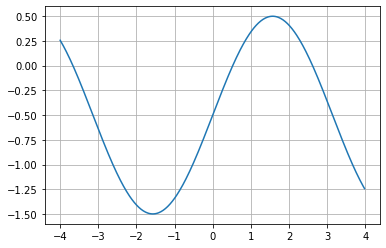

In [53]:
import numpy as np
import matplotlib.pyplot as plt

X = np.arange(-4,4, 0.02)
G_val = []

for x in X:
    G_val.append(G(x)[0])
    
plt.plot(X,G_val) 
plt.grid()

In [48]:
G(1)[0]

0.3414709848078965

A **while** loop is an easy way to create an infinite loop.  It is recommended to build an emergency exit, e.g. by limiting the number of iterations in the above example:

In [92]:
# defining Newton's algorithm as a function
def Newton(function, x0):
    x = x0
    (f, df) = function(x)
    print("** {:20.16f} has error {:12.6e}".format(x, abs(f)))
    
    # adding the emergency counter
    cnt = 0
    
    while abs(f)>1.0e-12:
        x -= f/df
        (f, df) = function(x)
        print("** {:20.16f} has error {:12.6e}".format(x, abs(f)))
        
        # incrementing and checking the emergency counter
        cnt += 1   # python does not have the ++cnt operation :(
        if cnt>6:
            raise RuntimeError('failure to converge')
        
    return x
        
# now run a test
print(Newton(F,1.))
print(Newton(F,-1.))
print(Newton(F,0.01))

**   1.0000000000000000 has error 2.000000e+00
**   2.0000000000000000 has error 1.000000e+00
**   1.7500000000000000 has error 6.250000e-02
**   1.7321428571428572 has error 3.188776e-04
**   1.7320508100147276 has error 8.472674e-09
**   1.7320508075688772 has error 4.440892e-16
1.7320508075688772
**  -1.0000000000000000 has error 2.000000e+00
**  -2.0000000000000000 has error 1.000000e+00
**  -1.7500000000000000 has error 6.250000e-02
**  -1.7321428571428572 has error 3.188776e-04
**  -1.7320508100147276 has error 8.472674e-09
**  -1.7320508075688772 has error 4.440892e-16
-1.7320508075688772
**   0.0100000000000000 has error 2.999900e+00
** 150.0049999999999670 has error 2.249850e+04
**  75.0124996666777548 has error 5.623875e+03
**  37.5262465006498616 has error 1.405219e+03
**  18.8030952736386396 has error 3.505564e+02
**   9.4813217366773870 has error 8.689546e+01
**   4.8988666588032679 has error 2.099889e+01
**   2.7556265990846325 has error 4.593478e+00


RuntimeError: failure to converge

This example demonstrates pythons exception handling mechanism.  Every type of error **raises** an exception. The exception will terminate the program by informing the user WHAT went wrong and WHERE this exception occured.  Common exceptions are DivisionByZero or EOFError, among many others.  You may raise your own exception simply by calling **raise** with or without a specific exception type.

<hr>

[Jump to chapter 2: Matrix Data Types](./02%20Matrix%20Data%20Types.ipynb)

[Back to the outline](./00%20Outline.ipynb)

